In [15]:
#PUNTO 1

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

wine = load_wine()

In [67]:
X = wine.data
X_norm = StandardScaler().fit_transform(wine.data)

In [68]:
#Cargo la siguiente data, en xTrain,le cargo el 80% de los datos de X(wine.data) a xTrain, y el 20% restante, a xTest
#Tambien, porcentualmente de la misma manera, asigno sus etiquetas o targets a yTrain e yTest
xTrain,xTest,yTrain,yTest = train_test_split(X,wine.target,test_size=0.2,random_state=5)
#Luego, ejecuto el mismo procedimiento con la data normalizada
xTrainNorm,xTestNorm,yTrainNorm,yTestNorm = train_test_split(X_norm, wine.target,test_size=0.2,random_state=5)

#Aclaro, el random_state se encarga de hacer un "shuffle" de los datos, que se mezclan segun su valor, por lo que, para que
#tanto la data normalizada como la normal sean iguales, su valor en random_state debe de ser la mismag


In [69]:
#PUNTO 2

In [70]:
#Datos sin normalizar
#Primero, importamos las librerias que se nos ordena
from sklearn import neighbors

#Luego, creamos la variable knn, que representara este tipo de predicción y fiteamos la data
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(xTrain[:,:2], yTrain)



KNeighborsClassifier()

In [71]:
#Luego, comenzamos con la predicción del primer dataset para luego graficarla.

#Delimitamos los bordes en los cuales podremos hacer el cuadro.
x_min, x_max = xTrain[:, 0].min() -1, xTrain[:,0].max()+1
y_min, y_max = xTrain[:, 1].min() -1, xTrain[:,1].max()+1
xx, yy=np.meshgrid(np.arange(x_min,x_max,0.1), np.arange(y_min, y_max, 0.1))


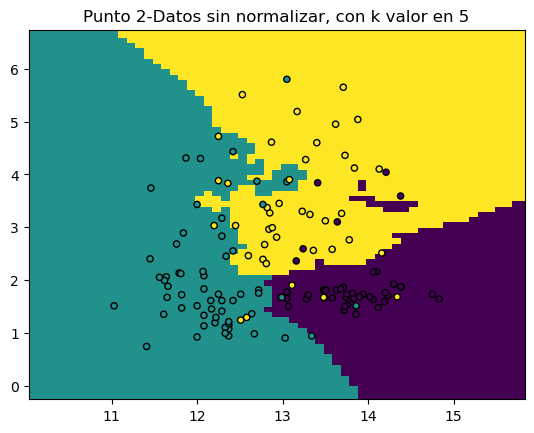

In [72]:
#Creamos la primera predicción
pred = knn.predict(np.c_[xx.ravel(), yy.ravel()])

#Asignamos el resultado de la predicción al grafico
pred = pred.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy, pred,shading='auto')

#Mostramos los puntos del dato de entrenamiento
plt.scatter(xTrain[:,0], xTrain[:,1],c=yTrain, edgecolor='k' , s=20)
plt.xlim(xx.min(),xx.max() )
plt.ylim(yy.min(),yy.max() )
plt.title("Punto 2-Datos sin normalizar, con k valor en 5")

#Mostramos el grafico
plt.show()



In [73]:
#Datos normalizados
#Primero, importamos las librerias que se nos ordena
from sklearn import neighbors

#Luego, creamos la variable knn, que representara este tipo de predicción y fiteamos la data
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(xTrainNorm[:,:2], yTrainNorm)

KNeighborsClassifier()

In [74]:
#Luego, comenzamos con la predicción del primer dataset para luego graficarla.

#Delimitamos los bordes en los cuales podremos hacer el cuadro.
x_min, x_max = xTrainNorm[:, 0].min() -1, xTrainNorm[:,0].max()+1
y_min, y_max = xTrainNorm[:, 1].min() -1, xTrainNorm[:,1].max()+1
xx, yy=np.meshgrid(np.arange(x_min,x_max,0.1), np.arange(y_min, y_max, 0.1))

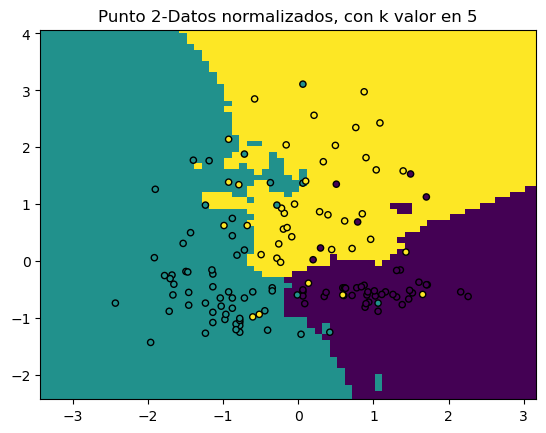

In [75]:
#Creamos la primera predicción
pred = knn.predict(np.c_[xx.ravel(), yy.ravel()])

#Asignamos el resultado de la predicción al grafico
pred = pred.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy, pred,shading='auto')

#Mostramos los puntos del dato de entrenamiento
plt.scatter(xTrainNorm[:,0], xTrainNorm[:,1],c=yTrainNorm, edgecolor='k' , s=20)
plt.xlim(xx.min(),xx.max() )
plt.ylim(yy.min(),yy.max() )
plt.title("Punto 2-Datos normalizados, con k valor en 5")

#Mostramos el grafico
plt.show()

In [76]:
#PUNTO 3

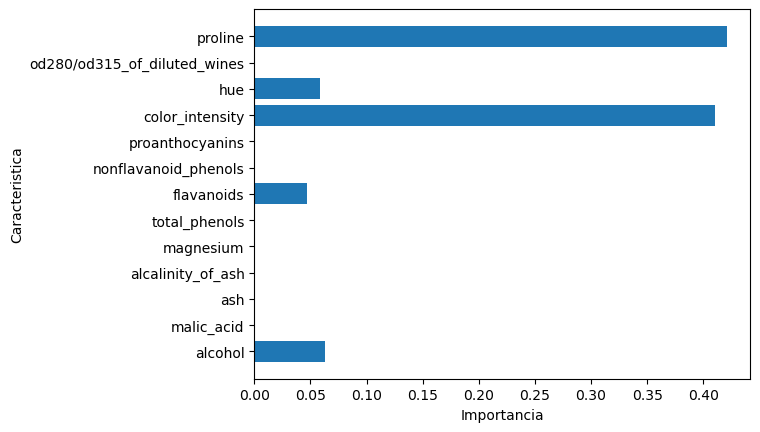

El score es: 0.8055555555555556


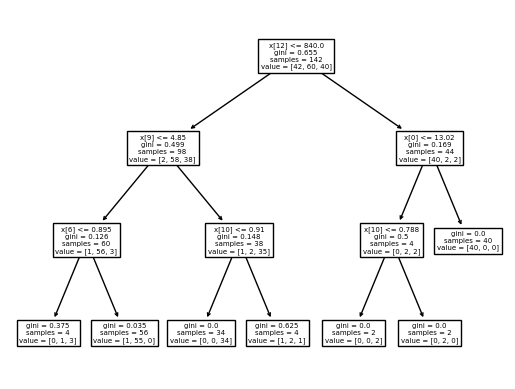

In [102]:
#Datos sin normalizar
#Importamos las librerias necesarias para utilizar arbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.tree import plot_tree

#Creamos la variable, definiendo su maxima depth, y fiteamos los datos
arbol=DecisionTreeClassifier(max_depth=3)
arbol.fit(xTrain, yTrain)
#Este score no se ve, pero esta para mostrar la puntuación.





#Luego, lo mostramos tambien como un cuadro
caracteristica=wine.data.shape[1]
plt.barh(range(caracteristica),arbol.feature_importances_)
plt.yticks(np.arange(caracteristica),wine.feature_names)
plt.xlabel('Importancia')
plt.ylabel('Caracteristica')
plt.show()

plot_tree(arbol)
print("El score es: " + str(arbol.score(xTest, yTest)) )


El score es: 0.8055555555555556


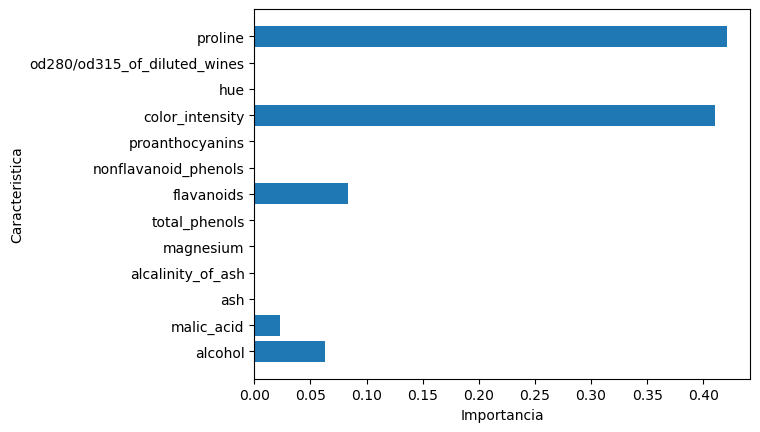

[Text(0.5769230769230769, 0.875, 'x[12] <= 0.296\ngini = 0.655\nsamples = 142\nvalue = [42, 60, 40]'),
 Text(0.3076923076923077, 0.625, 'x[9] <= -0.09\ngini = 0.499\nsamples = 98\nvalue = [2, 58, 38]'),
 Text(0.15384615384615385, 0.375, 'x[6] <= -1.139\ngini = 0.126\nsamples = 60\nvalue = [1, 56, 3]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.035\nsamples = 56\nvalue = [1, 55, 0]'),
 Text(0.46153846153846156, 0.375, 'x[6] <= -0.632\ngini = 0.148\nsamples = 38\nvalue = [1, 2, 35]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.625\nsamples = 4\nvalue = [1, 2, 1]'),
 Text(0.8461538461538461, 0.625, 'x[0] <= 0.024\ngini = 0.169\nsamples = 44\nvalue = [40, 2, 2]'),
 Text(0.7692307692307693, 0.375, 'x[1] <= 0.012\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [

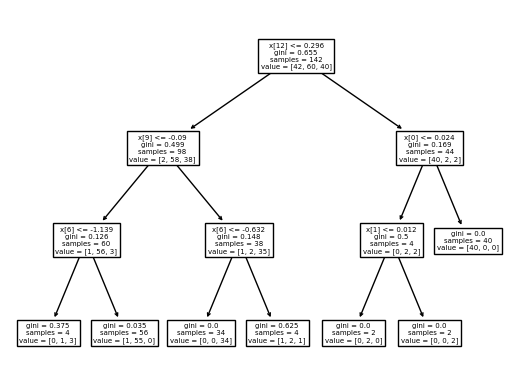

In [97]:
#DATOS NORMALIZADOS
#Importamos las librerias necesarias para utilizar arbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.tree import plot_tree

#Creamos la variable, definiendo su maxima depth, y fiteamos los datos
arbol=DecisionTreeClassifier(max_depth=3)
arbol.fit(xTrainNorm, yTrainNorm)
#Este score no se ve, pero esta para mostrar la puntuación.
print("El score es: " + str(arbol.score(xTestNorm, yTestNorm)) )



#Luego, lo mostramos tambien como un cuadro
caracteristica=wine.data.shape[1]
plt.barh(range(caracteristica),arbol.feature_importances_)
plt.yticks(np.arange(caracteristica),wine.feature_names)
plt.xlabel('Importancia')
plt.ylabel('Caracteristica')
plt.show()

plot_tree(arbol)